In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
L = 12
N = L**2 ## No. of spins
J = 1.0 # Coupling constant

In [ ]:
def create_picture(positions,colors):
    plt.cla()
    
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca())
    for pos, col in zip(positions,colors):
        square = plt.Rectangle((pos[0], pos[1]), 0.8, 0.8, fc = col)
        plt.gca().add_patch(square)
        
def color(i):
    if i == 1: return 'r'
    else: return 'b'

In [ ]:
## Identifies the nearest neighbors of spin numbered i.
## Note that edges are identified, so that there are no boundaries.

def right(i):
    if (i+1)%L == 0: return i+1-L 
    else: return i+1

def left(i):
    if i%L == 0: return i-1+L
    else: return i-1

def up(i):
    return (i+L)%N

def down(i):
    return (i-L+N)%N

In [ ]:
## List of neighbors of each spin.
neighbors = [[right(i),left(i),up(i),down(i)] for i in range(N)]
## coordinates of each spin. Just for visualization.
coordinates = [[i%L,i//L] for i in range(N)]
orientations = [-1,1]     #either up spin or down spin
ini_spins = []
spins= []
colors = []
susceptibility=[]

In [ ]:
##### initial spin assignment ##################

ini_spins=[]
for i in range(N):
    spin = np.random.choice(orientations)
    ini_spins.append(spin)

print(ini_spins)



[1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1]


In [ ]:
p=0
n=0
for i in range(len(ini_spins)):
  if ini_spins[i]== 1:
    p+=1
  if ini_spins[i]== -1:
    n+=1
print(p)
print(n)

73
71


In [ ]:
nsteps = 10000*N
#T =  3.0  # Temperature, in units of J/k_B.
#beta = 1/T
T_list = [1.0 + 0.2 * i for i in range(15)]
mean_mag_list=[]
len_T_list= len(T_list)

spins=[]
for j in range(len(ini_spins)):
  spins.append(ini_spins[j])
#new_mean_mag_list=[]
#new_list=[]

for t in T_list:
  beta= 1/t
  mag_list=[]
  magnetisation=0

    #print(ini_spins)
  #mean_mag_list=[]
  #spins=ini_spins     
  for step in tqdm(range(nsteps)):    
    #magnetisation= (sum(spins))/N
    #mag_list.append(magnetisation)
    k = np.random.randint(0, N - 1) ### Choose a random spin and try to flip it.
    delta_E = 2.0 * spins[k] * sum(spins[j] for j in neighbors[k]) # Change in energy due to the spin flip.
    if np.random.uniform(0.0, 1.0) <  np.exp(-beta * delta_E): # Metropolis accepatance probability.
      spins[k] *= -1
    if t== T_list[0]:
      if step>= (0.5*nsteps):
        magnetisation= abs((sum(spins))/N)
        mag_list.append(magnetisation)
    else:
      magnetisation= abs((sum(spins))/N)
      mag_list.append(magnetisation)
     
  mean_mag= np.mean(mag_list)
  mean_mag_list.append(mean_mag)
  squared_mean_mag= sum(i**2 for i in mag_list)/ len(mag_list)
  susceptibility.append((squared_mean_mag - mean_mag**2)/t)

100%|██████████| 1440000/1440000 [00:35<00:00, 40258.83it/s]


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

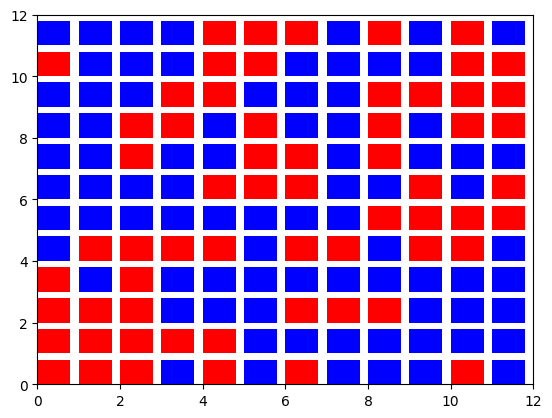

In [ ]:
for i in range(N):
    colors.append(color(spins[i]))

create_picture(coordinates,colors)

In [ ]:
print(T_list)
print(mean_mag_list)

[1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8, 3.0, 3.2, 3.4000000000000004, 3.6, 3.8000000000000003]
[0.984315625, 0.9804857445987655, 0.9722119888117284, 0.9570118441358016, 0.9250991415895052, 0.8872362172067902, 0.8224446662808641, 0.6044201003086419, 0.3975193479938273, 0.2807796682098766, 0.22309537037037044, 0.18951467978395062, 0.17161939621913572, 0.1593660108024692, 0.1495071084104939]


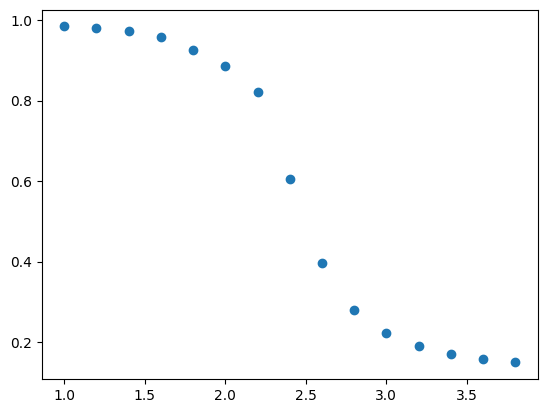

In [ ]:
plt.scatter(T_list,mean_mag_list)
#plt.plot(T_list, mean_mag_list)

Text(0, 0.5, 'Susceptibility')

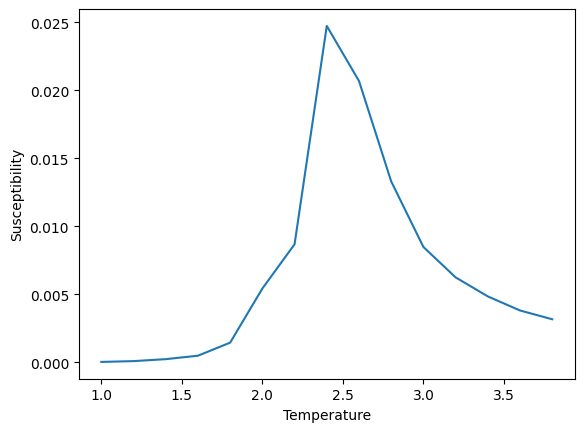

In [ ]:
plt.plot(T_list, susceptibility)
plt.xlabel("Temperature")
plt.ylabel("Susceptibility")